### inspiration from the diy image site: https://www.diy-malennachzahlen.de/
- reduce the resolution of a picutre
- draw the contour of the picture
- found the programming task here: https://codegolf.stackexchange.com/questions/42217/paint-by-numbers

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from skimage import io, color

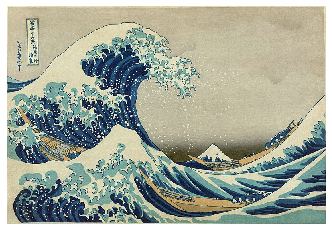

In [5]:
# image = cv2.imread("800px-Great_Wave_off_Kanagawa2.jpg")
origin_image= plt.imread("800px-Great_Wave_off_Kanagawa2.jpg")
image = origin_image.copy()
plt.axis("off")
plt.imshow(origin_image)
plt.show()

In [6]:
pixel1 = image[1][2]
pixel2 = image[2][3]

In [7]:
pixel1

array([253, 244, 205], dtype=uint8)

In [8]:
image.shape

(547, 800, 3)

In [9]:
def euclide_distance(pixel1, pixel2):
    return np.sqrt((pixel1[0] - pixel2[0])**2 +(pixel1[1] - pixel2[1])**2 + (pixel1[2] - [pixel2[2]])**2)

In [10]:
euclide_distance(pixel1, pixel2)

array([55.244907], dtype=float32)

In [11]:
target_color = np.array([(i, j, k) 
                         for i in range(10) 
                         for j in range(10) for k in range(10)])
replacement_color = np.array([0, 0 ,0])

In [12]:
flood_fill(image, 1, 2, target_color, replacement_color)

NameError: name 'flood_fill' is not defined

NameError: name 'flood_fill' is not defined

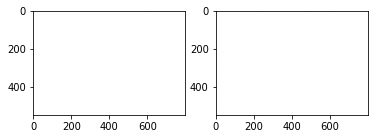

In [13]:
random_array = np.random.randint(254, 256, size=(547, 800, 3))
# print(f'original random array: {random_array}')

fig, axs = plt.subplots(1, 2)
axs[0].imshow(random_array)
plt.imshow(random_array)
target = np.array([255, 255, 255])
replacement = np.array([0, 0, 0])
flood_fill(random_array, 2, 3, target, replacement_color)
axs[1].imshow(random_array)
# print(f'current random array: {random_array}')

In [14]:
queries = 5
action_sequences = list(product([0, 1, 2, 3, 4], repeat=2))
action_sequences

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]

### gray scale the image

In [15]:
for w in range(image.shape[0]): 
    for h in range(image.shape[1]):
        if any(image[w][h] >= 128):
            image[w][h] = [255, 255, 255]
        else:
            image[w][h] = [0, 0, 0]

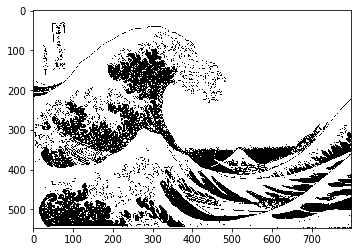

In [16]:
plt.imshow(image)

In [17]:
rgb = io.imread("800px-Great_Wave_off_Kanagawa2.jpg")
lab = color.rgb2lab(rgb)

In [18]:
min([lab[w][h][c] for w in range(lab.shape[0]) for h in range(lab.shape[1]) for c in range(lab.shape[2])])

-52.781022644965326

### pseudo code

In [19]:
while P> n and N > m: 

    for cell in cells: 
        if color_diff(neighbor(cell), cell) < threshold:
            color(cell) = color(neighbor(cell))
        

SyntaxError: can't assign to function call (<ipython-input-19-3214e848b8f2>, line 5)

(3, 547, 800)


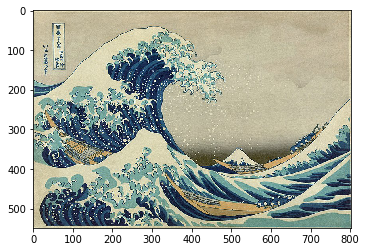

In [6]:
image2 = origin_image.copy()
img = image2.transpose(2,0,1)

print(img.shape)


pads = ((1, 1), (1, 1))

img_arr = np.ndarray((3, 549, 802), np.int)
for i,x in enumerate(img):
    cons = np.int(np.median(x))
    x_p = np.pad(x,pads,
                'constant', 
                 constant_values=1)
    img_arr[i,:,:] = x_p

ii = np.uint8(img_arr).transpose(1,2,0)

plt.imshow(ii)


In [7]:
THREADSHOLD = 30

In [9]:
for h in range(image2.shape[0]):
    for w in range(image2.shape[1]):
        
        # if the color differece between the cell and its right/left/up/down neighbor is smaller than the threadshold, 
        # replace the color of the cell with its right/left/up/down neighbor's color
        if w+1<image2.shape[1] and euclide_distance(image2[h][w], image2[h][w+1]) < THREADSHOLD:
            image2[h][w] = image2[h][w+1]
            print(f'replace the color of the cell {image2[h][w]} with its right neighbor')
        
        if w-1>=0 and euclide_distance(image2[h][w], image2[h][w-1]) < THREADSHOLD:
            image2[h][w] = image2[h][w-1]
            print(f'replace the color of the cell {image2[h][w]} with its left neighbor')
        
        if h-1>=0 and euclide_distance(image2[h][w], image2[h-1][w]) < THREADSHOLD:
            image2[h][w] = image2[h-1][w]
            print(f'replace the color of the cell {image2[h][w]} with its up neighbor')
        
        if h+1<image2.shape[0] and euclide_distance(image2[h][w], image2[h+1][w]) < THREADSHOLD:
            image2[h][w] = image2[h+1][w]
            print(f'replace the color of the cell {image2[h][w]} with its down neighbor')
    

NameError: name 'euclide_distance' is not defined